# 刘宇波老师《逻辑回归》课程总结

## 认识 Sigmoid 函数

$$
{\rm sigmoid}(t) = \frac{1}{1 + e^{-t}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def sigmoid(t):
    return 1. / (1. + np.exp(-t))

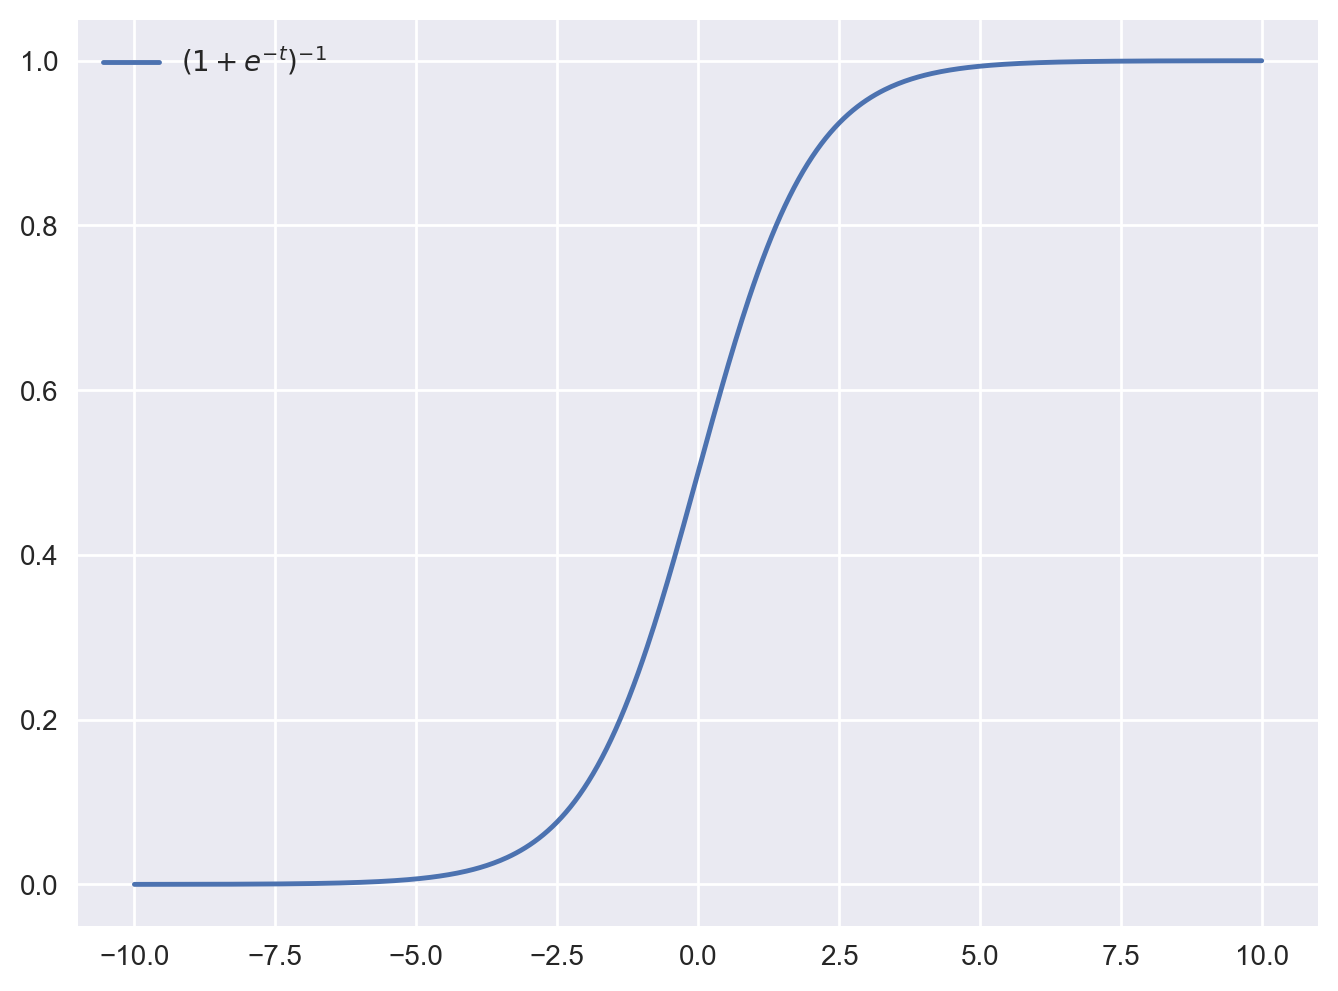

In [2]:
x = np.linspace(-10, 10, 500)

plt.figure(figsize=(8, 6), dpi=100)
plt.grid(b=True)
plt.plot(x, sigmoid(x), label='$(1+e^{-t})^{-1}$')
plt.legend()
plt.show()

## 极大似然估计等价于损失函数最小化

单个样本的损失：
$$
{\rm cost}(x) = y \cdot [-{\rm log}(x)] + (1 - y) \cdot [-{\rm log}(1 - x)]
$$
说明：这里 $x$ 表示预测出来的概率。

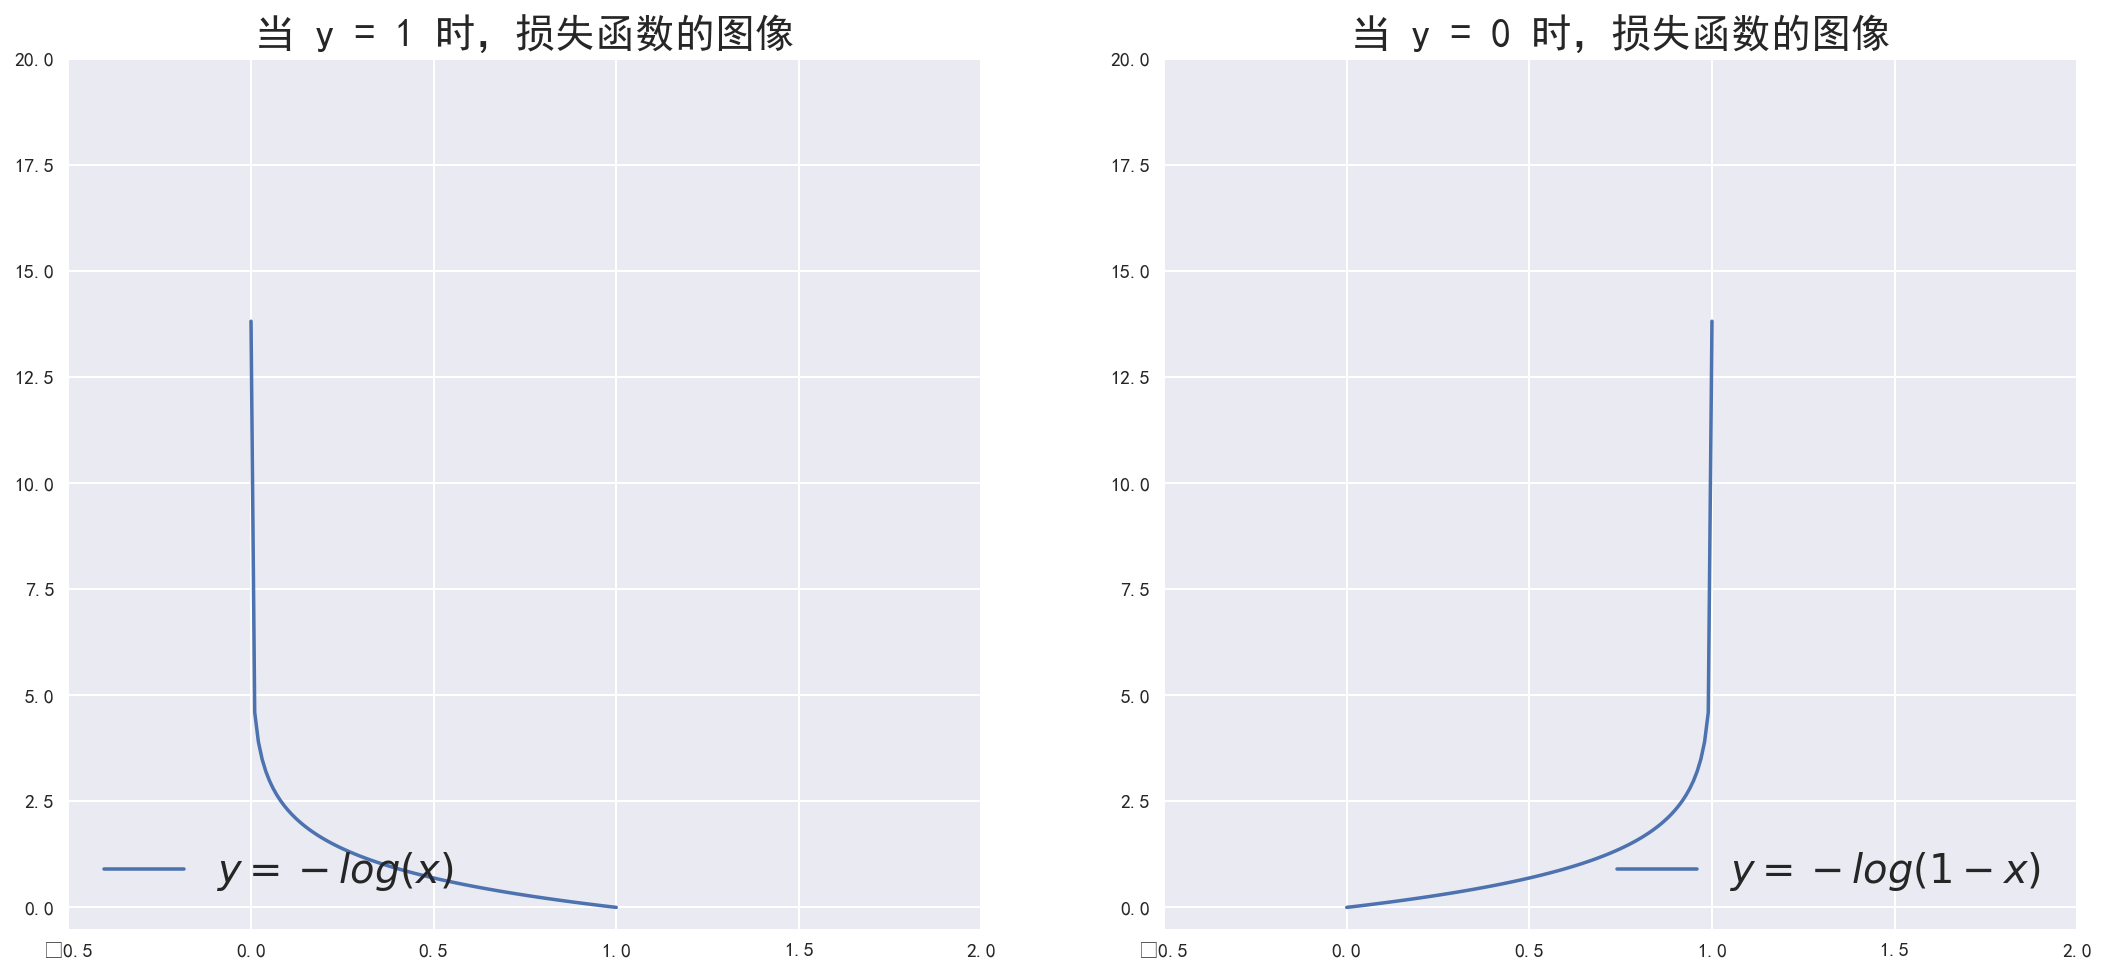

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']

epsilon = 1e-06
x = np.linspace(0 + epsilon, 1 - epsilon, 100)
plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.plot(x, -np.log(x), label='$y=-log(x)$')
plt.legend(loc='lower left', fontsize=20)
plt.xlim(-.5, 2)
plt.ylim(-.5, 20)
plt.title('当 y = 1 时，损失函数的图像', fontsize=20)
plt.grid(b=True)

plt.subplot(122)
plt.plot(x, -np.log(1 - x), label='$y=-log(1-x)$')
plt.xlim(-.5, 2)
plt.ylim(-.5, 20)
plt.title('当 y = 0 时，损失函数的图像', fontsize=20)
plt.grid(b=True)
plt.legend(loc='lower right', fontsize=20)
plt.show()

那么，对于所有的样本而言，损失函数就应该定义为上述单个样本损失函数的期望，即：
$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m} \{ y^{(i)} \cdot [-{\rm log}(\hat p^{(i)})] + (1 - y^{(i)}) \cdot [-{\rm log}(1 - \hat p^{(i)})]\} 
$$

从极大似然估计的角度得到的似然函数。

$$
L(\theta) =  \prod_{i=1}^{m}P(y^{(i)}|x^{(i)};\theta) = \prod_{i=1}^{m}(h_\theta(x^{(i)}))^{y^{(i)}}(1-h_\theta(x^{(i)}))^{(1-y^{(i)})}
$$

为了求极值，我们取对数。

## 损失函数的梯度数学推导

## 如果是非线性问题，逻辑回归就要

scikit-learn 中的 L1 正则化：
$$
C\cdot J(\theta) + L1
$$
scikit-learn 中的 L2 正则化：
$$
C\cdot J(\theta) + L2
$$

解读：如果 $C$ 越大，表示模型越不侧重正则，则会导致决策边界弯弯曲曲。反之，如果 $C$ 越小，表示模型越不侧重正则，则会导致决策边界趋于规整。

什么是 ovr 和 ovo？

+ OVR 是 one vs rest，假设我们的 target 有三个类 A、B、C，我们拿到一个新样本，这个时候我们做的事情是，（1）判断是否是 A 类，（2）判断是否是 B 类，（3）判断是否是 C 类，一共计算三次，得到概率值最高的那个就将它判断成这个类。
+ OVO 是 one vs one，假设我们的 target 有三个类 A、B、C，我们拿到一个新样本，这个时候我们做的事情是，（1）判断是 A 类还是 B 类，（2）判断是 A 类还是 C 类，（3）判断是 B 类还是 C 类，得到的票数最多的类就将它判断成这个类。

小结：one vs one 的方式时间复杂度更高，但是更准确，因为，我们每次都是拿真实的两个类去训练，而不像 one vs rest 有一些瑕疵。